## Setup ⚙️

In [4]:
import pandas as pd
import sklearn
import numpy as np
import os
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from tqdm import tqdm
import seaborn as sns
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import matplotlib.pyplot as plt 
import string
from collections import Counter

nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/dylantavares/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     /Users/dylantavares/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

## Read Data 

In [102]:
# read datas with pandas
df_text = pd.read_csv("../data/text/Flickr8k.lemma.token.txt", sep="\t", names=["img_name", "description"])
df_text.head(5)

img_name  \
0  1305564994_00513f9a5b.jpg#0   
1  1305564994_00513f9a5b.jpg#1   
2  1305564994_00513f9a5b.jpg#2   
3  1305564994_00513f9a5b.jpg#3   
4  1305564994_00513f9a5b.jpg#4   

                                         description  
0  A man in street racer armor be examine the tir...  
1         Two racer drive a white bike down a road .  
2  Two motorist be ride along on their vehicle th...  
3  Two person be in a small race car drive by a g...  
4       Two person in race uniform in a street car .

## General data infos ℹ️

In [4]:
df_text.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40460 entries, 0 to 40459
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   img_name     40460 non-null  object
 1   description  40460 non-null  object
dtypes: object(2)
memory usage: 632.3+ KB


In [5]:
df_text.describe()

img_name                 description
count                         40460                       40460
unique                        40460                       40079
top     3072611047_109bf8b7c3.jpg#1  Two dog play in the snow .
freq                              1                          11

## Punctuation and stop words

In [6]:
print(string.punctuation)
print("\n")
print(stopwords.words('french'))
print("\n")
print(stopwords.words('english'))

!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~


['au', 'aux', 'avec', 'ce', 'ces', 'dans', 'de', 'des', 'du', 'elle', 'en', 'et', 'eux', 'il', 'ils', 'je', 'la', 'le', 'les', 'leur', 'lui', 'ma', 'mais', 'me', 'même', 'mes', 'moi', 'mon', 'ne', 'nos', 'notre', 'nous', 'on', 'ou', 'par', 'pas', 'pour', 'qu', 'que', 'qui', 'sa', 'se', 'ses', 'son', 'sur', 'ta', 'te', 'tes', 'toi', 'ton', 'tu', 'un', 'une', 'vos', 'votre', 'vous', 'c', 'd', 'j', 'l', 'à', 'm', 'n', 's', 't', 'y', 'été', 'étée', 'étées', 'étés', 'étant', 'étante', 'étants', 'étantes', 'suis', 'es', 'est', 'sommes', 'êtes', 'sont', 'serai', 'seras', 'sera', 'serons', 'serez', 'seront', 'serais', 'serait', 'serions', 'seriez', 'seraient', 'étais', 'était', 'étions', 'étiez', 'étaient', 'fus', 'fut', 'fûmes', 'fûtes', 'furent', 'sois', 'soit', 'soyons', 'soyez', 'soient', 'fusse', 'fusses', 'fût', 'fussions', 'fussiez', 'fussent', 'ayant', 'ayante', 'ayantes', 'ayants', 'eu', 'eue', 'eues', 'eus', 'ai', 'as', 'avons', 'avez', 'ont', 'aura

# Word Frenquency Analysis

In [9]:
# Cleaning function which tokenize, remove stop_words and punctuation
def cleaningText(col):
    tokens = []
    filtered_sentence = []
    for desc in col:
        tokenlist = word_tokenize(desc)
        for token in tokenlist:
            token = token.lower()
            tokens.append(token)
    for w in tokens:
        if w not in stopwords.words('english'):
            if w not in string.punctuation:
                filtered_sentence.append(w)
    return filtered_sentence

In [103]:
l = cleaningText(df_text["description"])
print("Preview of tokens : ",l[0:50])

Preview of tokens :  ['man', 'street', 'racer', 'armor', 'examine', 'tire', 'another', 'racer', "'s", 'motorbike', 'two', 'racer', 'drive', 'white', 'bike', 'road', 'two', 'motorist', 'ride', 'along', 'vehicle', 'oddly', 'design', 'color', 'two', 'person', 'small', 'race', 'car', 'drive', 'green', 'hill', 'two', 'person', 'race', 'uniform', 'street', 'car', 'firefighter', 'extinguish', 'fire', 'hood', 'car', 'fireman', 'spray', 'water', 'hood', 'small', 'white', 'car']


In [86]:
print("Number of unique descriptions:",len(df_text["description"].unique()),"/",len(df_text["description"]))

Number of unique descriptions: 40079 / 40460


In [138]:
print("Number of unique words:",len(pd.Series(l).unique()),"/",len(pd.Series(l)))

Number of unique words: 6658 / 251839


In [141]:
df_s = pd.DataFrame(wordFreq[wordFreq<50], columns=["occurences"])
print("Number of words which frequency is less than 50 occurences : ", len(df_s))

Number of words which frequency is less than 50 occurences :  6076


## The most frequent words 📈

In [153]:
wordFreq = pd.Series(Counter(l)).sort_values(ascending=False)
df_mostWordFreq = pd.DataFrame(wordFreq[wordFreq>2000], columns=["occurences"])

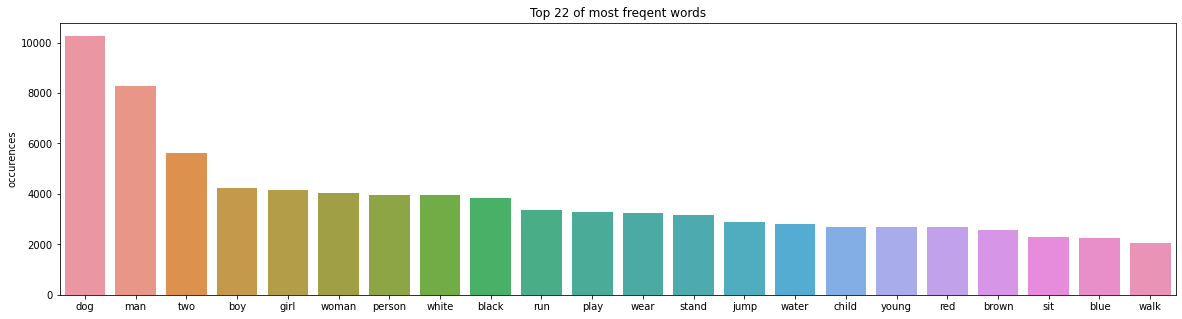

In [154]:
plt.figure(figsize=(20,5))
plt.title("Top 22 of most freqent words")
mostWordFreqPlot = sns.barplot(y=df_mostWordFreq["occurences"], x=df_mostWordFreq.index)
mostWordFreqPlot
mostWordFreqPlot.get_figure().savefig("graphs/mostWordFreqPlot.jpg")

## The least frequent words 📉

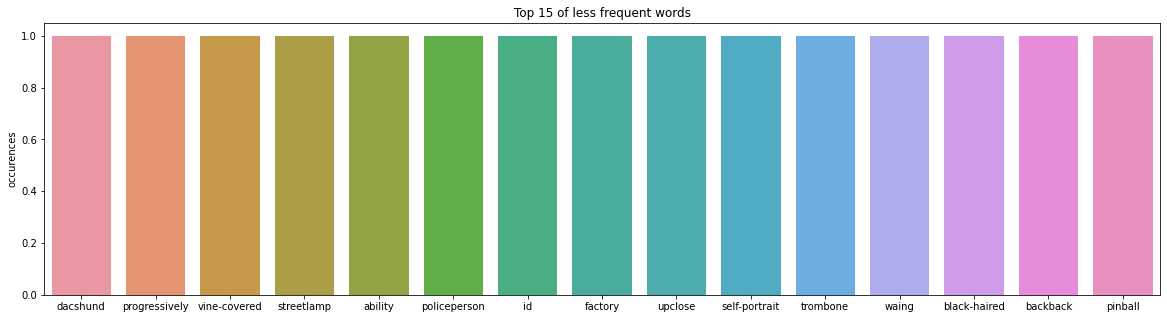

In [156]:
df_lessWordFreq = pd.DataFrame(wordFreq[wordFreq<3], columns=["occurences"])
plt.figure(figsize=(20,5))
plt.title("Top 15 of less frequent words")
lessWordFreqPlot = sns.barplot(y=df_lessWordFreq["occurences"][-15:], x=df_lessWordFreq.index[-15:])
lessWordFreqPlot
lessWordFreqPlot.get_figure().savefig("graphs/lessWordFreqPlot.jpg")

In [21]:
df_lessWordFreq = pd.DataFrame(wordFreq[wordFreq<100], columns=["occurences"])
df_lessWordFreq.value_counts()

occurences
1             2833
2              819
3              445
4              297
5              239
              ... 
88               1
79               1
68               1
59               1
99               1
Length: 98, dtype: int64

In [22]:
df_lessWordFreq.count()

occurences    6298
dtype: int64

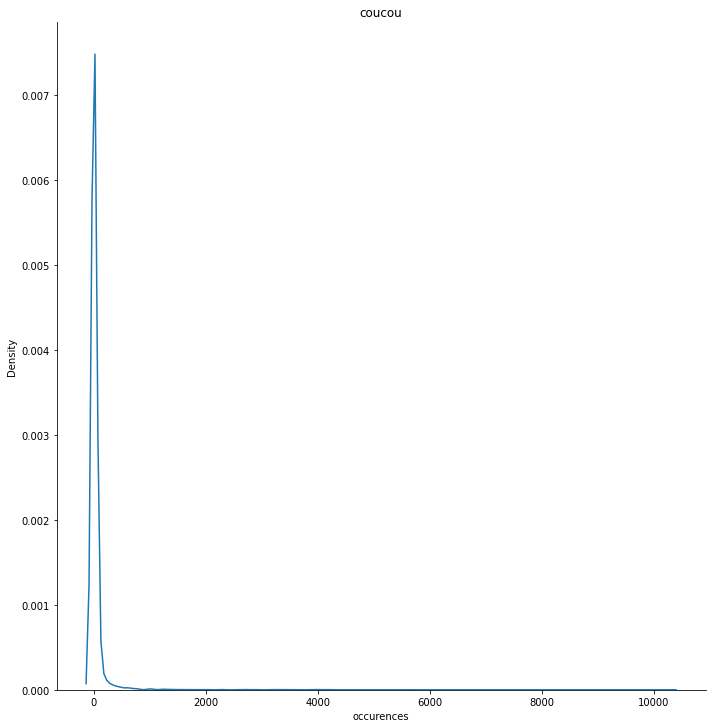

In [190]:
wordFreq = pd.Series(Counter(l)).sort_values(ascending=True)
df_WordsOcc = pd.DataFrame(wordFreq, columns=["occurences"])
dist_word_plot = sns.displot(df_WordsOcc, x="occurences", kind="kde", height=10).set(title="coucou")
dist_word_plot
dist_word_plot.savefig("graphs/words_density")

# Word cloud ☁️

In [178]:
# install wordcloud
#%pip install wordcloud

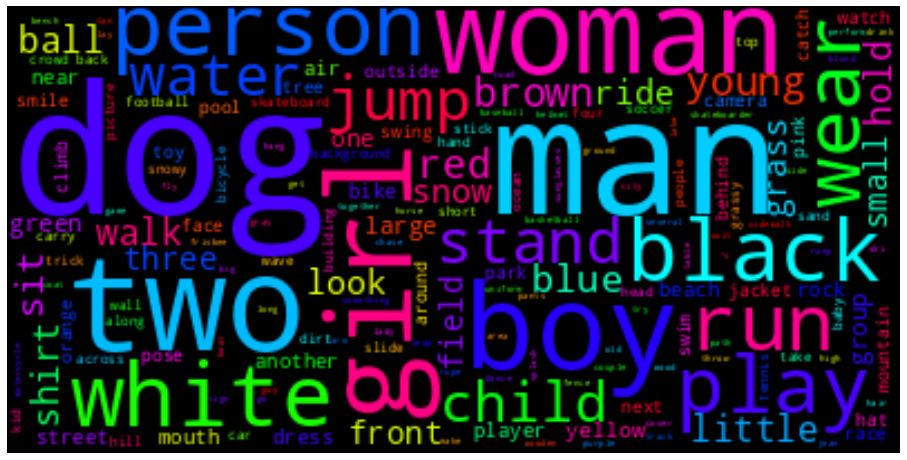

In [187]:
from wordcloud import WordCloud

cloud = WordCloud(max_font_size=80,colormap="hsv").generate_from_frequencies(Counter(l))
plt.figure(figsize=(16,12))
plt.imshow(cloud, interpolation='bilinear')
plt.axis('off')
plt.show()
cloud.to_file("graphs/wordcloud.png")

# TF-IDF (Term Frequency-Inverse Document Frequency)

In [71]:
def tfidf(data):
    tfidf_vectorizer = TfidfVectorizer(stop_words="english")

    result = tfidf_vectorizer.fit_transform(data)
    print(result.shape)
    
    feature_names = tfidf_vectorizer.get_feature_names()
    dense = result.todense()
    denselist = dense.tolist()
    
    return denselist, feature_names

denselist, feature_names = tfidf(df_text["description"])

(40460, 6417)


In [ ]:
df_tfidf = pd.DataFrame(denselist, columns=feature_names, index=df_text["img_name"].values)
df_tfidf

In [96]:
df_text.loc['00_Document Frequency'] = (df_tfidf > 0).sum()

In [104]:
tfidf_slice = df_tfidf[["dog", "man", "two", "boy", "girl", "woman", "person", "white", "black", "run", "play", "wear", "stand", "jump", "water"]]
tfidf_slice.sort_index().round(decimals=2)

dog   man  two  boy  girl  woman  person  white  \
1000268201_693b08cb0e.jpg#0  0.0  0.00  0.0  0.0  0.00    0.0    0.00    0.0   
1000268201_693b08cb0e.jpg#1  0.0  0.00  0.0  0.0  0.29    0.0    0.00    0.0   
1000268201_693b08cb0e.jpg#2  0.0  0.00  0.0  0.0  0.23    0.0    0.00    0.0   
1000268201_693b08cb0e.jpg#3  0.0  0.00  0.0  0.0  0.22    0.0    0.00    0.0   
1000268201_693b08cb0e.jpg#4  0.0  0.00  0.0  0.0  0.20    0.0    0.00    0.0   
...                          ...   ...  ...  ...   ...    ...     ...    ...   
997722733_0cb5439472.jpg#0   0.0  0.23  0.0  0.0  0.00    0.0    0.00    0.0   
997722733_0cb5439472.jpg#1   0.0  0.24  0.0  0.0  0.00    0.0    0.00    0.0   
997722733_0cb5439472.jpg#2   0.0  0.00  0.0  0.0  0.00    0.0    0.18    0.0   
997722733_0cb5439472.jpg#3   0.0  0.00  0.0  0.0  0.00    0.0    0.00    0.0   
997722733_0cb5439472.jpg#4   0.0  0.00  0.0  0.0  0.00    0.0    0.00    0.0   

                             black  run  play  wear  stand  jump  water  
1000268201_693b08cb0e.jpg#0    0.0  0.0   0.0   0.0    0.0   0.0    0.0  
1000268201_693b08cb0e.jpg#1    0.0  0.0   0.0   0.0    0.0   0.0    0.0  
1000268201_693b08cb0e.jpg#2    0.0  0.0   0.0   0.0    0.0   0.0    0.0  
1000268201_693b08cb0e.jpg#3    0.0  0.0   0.0   0.0    0.0   0.0    0.0  
1000268201_693b08cb0e.jpg#4    0.0  0.0   0.0   0.0    0.0   0.0    0.0  
...                            ...  ...   ...   ...    ...   ...    ...  
997722733_0cb5439472.jpg#0     0.0  0.0   0.0   0.0    0.0   0.0    0.0  
997722733_0cb5439472.jpg#1     0.0  0.0   0.0   0.0    0.0   0.0    0.0  
997722733_0cb5439472.jpg#2     0.0  0.0   0.0   0.0    0.0   0.0    0.0  
997722733_0cb5439472.jpg#3     0.0  0.0   0.0   0.0    0.0   0.0    0.0  
997722733_0cb5439472.jpg#4     0.0  0.0   0.0   0.0    0.0   0.0    0.0  

[40460 rows x 15 columns]

In [191]:
tfidf_slice = df_tfidf
tfidf_slice.sort_index().round(decimals=2)

08   10  104   11   12   13  13406  157   17  \
1000268201_693b08cb0e.jpg#0  0.0  0.0  0.0  0.0  0.0  0.0    0.0  0.0  0.0   
1000268201_693b08cb0e.jpg#1  0.0  0.0  0.0  0.0  0.0  0.0    0.0  0.0  0.0   
1000268201_693b08cb0e.jpg#2  0.0  0.0  0.0  0.0  0.0  0.0    0.0  0.0  0.0   
1000268201_693b08cb0e.jpg#3  0.0  0.0  0.0  0.0  0.0  0.0    0.0  0.0  0.0   
1000268201_693b08cb0e.jpg#4  0.0  0.0  0.0  0.0  0.0  0.0    0.0  0.0  0.0   
...                          ...  ...  ...  ...  ...  ...    ...  ...  ...   
997722733_0cb5439472.jpg#0   0.0  0.0  0.0  0.0  0.0  0.0    0.0  0.0  0.0   
997722733_0cb5439472.jpg#1   0.0  0.0  0.0  0.0  0.0  0.0    0.0  0.0  0.0   
997722733_0cb5439472.jpg#2   0.0  0.0  0.0  0.0  0.0  0.0    0.0  0.0  0.0   
997722733_0cb5439472.jpg#3   0.0  0.0  0.0  0.0  0.0  0.0    0.0  0.0  0.0   
997722733_0cb5439472.jpg#4   0.0  0.0  0.0  0.0  0.0  0.0    0.0  0.0  0.0   

                              19  ...  zebra  zepra  zig  zigzag  zip  \
1000268201_693b08cb0e.jpg#0  0.0  ...    0.0    0.0  0.0     0.0  0.0   
1000268201_693b08cb0e.jpg#1  0.0  ...    0.0    0.0  0.0     0.0  0.0   
1000268201_693b08cb0e.jpg#2  0.0  ...    0.0    0.0  0.0     0.0  0.0   
1000268201_693b08cb0e.jpg#3  0.0  ...    0.0    0.0  0.0     0.0  0.0   
1000268201_693b08cb0e.jpg#4  0.0  ...    0.0    0.0  0.0     0.0  0.0   
...                          ...  ...    ...    ...  ...     ...  ...   
997722733_0cb5439472.jpg#0   0.0  ...    0.0    0.0  0.0     0.0  0.0   
997722733_0cb5439472.jpg#1   0.0  ...    0.0    0.0  0.0     0.0  0.0   
997722733_0cb5439472.jpg#2   0.0  ...    0.0    0.0  0.0     0.0  0.0   
997722733_0cb5439472.jpg#3   0.0  ...    0.0    0.0  0.0     0.0  0.0   
997722733_0cb5439472.jpg#4   0.0  ...    0.0    0.0  0.0     0.0  0.0   

                             zippered  zombie  zone  zoo  zoom  
1000268201_693b08cb0e.jpg#0       0.0     0.0   0.0  0.0   0.0  
1000268201_693b08cb0e.jpg#1       0.0     0.0   0.0  0.0   0.0  
1000268201_693b08cb0e.jpg#2       0.0     0.0   0.0  0.0   0.0  
1000268201_693b08cb0e.jpg#3       0.0     0.0   0.0  0.0   0.0  
1000268201_693b08cb0e.jpg#4       0.0     0.0   0.0  0.0   0.0  
...                               ...     ...   ...  ...   ...  
997722733_0cb5439472.jpg#0        0.0     0.0   0.0  0.0   0.0  
997722733_0cb5439472.jpg#1        0.0     0.0   0.0  0.0   0.0  
997722733_0cb5439472.jpg#2        0.0     0.0   0.0  0.0   0.0  
997722733_0cb5439472.jpg#3        0.0     0.0   0.0  0.0   0.0  
997722733_0cb5439472.jpg#4        0.0     0.0   0.0  0.0   0.0  

[40460 rows x 6417 columns]

In [184]:
df_text

img_name  \
0      1305564994_00513f9a5b.jpg#0   
1      1305564994_00513f9a5b.jpg#1   
2      1305564994_00513f9a5b.jpg#2   
3      1305564994_00513f9a5b.jpg#3   
4      1305564994_00513f9a5b.jpg#4   
...                            ...   
40455   989754491_7e53fb4586.jpg#0   
40456   989754491_7e53fb4586.jpg#1   
40457   989754491_7e53fb4586.jpg#2   
40458   989754491_7e53fb4586.jpg#3   
40459   989754491_7e53fb4586.jpg#4   

                                             description  
0      A man in street racer armor be examine the tir...  
1             Two racer drive a white bike down a road .  
2      Two motorist be ride along on their vehicle th...  
3      Two person be in a small race car drive by a g...  
4           Two person in race uniform in a street car .  
...                                                  ...  
40455  A girl in a pool wear goggles and surround by ...  
40456  A girl in green goggles in a pool with three o...  
40457  A red haired girl make a peace sign be wear ne...  
40458  A redheaded girl offer a peace sign as she swi...  
40459  A young girl with goggles and floaties pose fo...  

[40460 rows x 2 columns]

# Pre-processing slide

In [1]:
# Tokenisation
from nltk.tokenize import word_tokenize
sentence = "Je suis un développeur en intelligence artificielle, aussi en web."
token_list = word_tokenize(sentence)
token_list

['Je',
 'suis',
 'un',
 'développeur',
 'en',
 'intelligence',
 'artificielle',
 ',',
 'aussi',
 'en',
 'web',
 '.']

In [2]:
# Minusculisation
token_list_min = []
for i in token_list:
    token_list_min.append(i.lower())
token_list_min

['je',
 'suis',
 'un',
 'développeur',
 'en',
 'intelligence',
 'artificielle',
 ',',
 'aussi',
 'en',
 'web',
 '.']

In [5]:
# Supression stop words
token_list_min_no_stopw = []
for w in token_list_min:
        if w not in stopwords.words('french'):
            token_list_min_no_stopw.append(w)
token_list_min_no_stopw

['développeur', 'intelligence', 'artificielle', ',', 'aussi', 'web', '.']

In [7]:
# Supression de la ponctuation
filtered_sentence = []
for w in token_list_min_no_stopw:
    if w not in string.punctuation:
        filtered_sentence.append(w)    
filtered_sentence

['développeur', 'intelligence', 'artificielle', 'aussi', 'web']

In [9]:
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize
  
ps = PorterStemmer()
 
for w in filtered_sentence:
    print(w, " : ", ps.stem(w))

développeur  :  développeur
intelligence  :  intellig
artificielle  :  artificiel
aussi  :  aussi
web  :  web
